In [1]:
# Packages
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
import matplotlib.pyplot as plt
%matplotlib inline
import spacy
from nltk.stem import WordNetLemmatizer
import re
import gensim 
from gensim import corpora
from gensim.models import LdaModel
from gensim.models import CoherenceModel
from string import punctuation
from pprint import pprint


In [2]:
# Reading and Displaying the Given Dataset
df1=pd.read_csv(r"C:\Users\Gowsik\Downloads\1580822109_1570782847_proj1\K8 Reviews v0.2.csv")
df1

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...
...,...,...
14670,1,"I really like the phone, Everything is working..."
14671,1,The Lenovo K8 Note is awesome. It takes best p...
14672,1,Awesome Gaget.. @ this price
14673,1,This phone is nice processing will be successf...


In [3]:
# performing EDA
df1.shape

(14675, 2)

In [4]:
df1.columns

Index(['sentiment', 'review'], dtype='object')

In [5]:
df1.describe

<bound method NDFrame.describe of        sentiment                                             review
0              1             Good but need updates and improvements
1              0  Worst mobile i have bought ever, Battery is dr...
2              1  when I will get my 10% cash back.... its alrea...
3              1                                               Good
4              0  The worst phone everThey have changed the last...
...          ...                                                ...
14670          1  I really like the phone, Everything is working...
14671          1  The Lenovo K8 Note is awesome. It takes best p...
14672          1                       Awesome Gaget.. @ this price
14673          1  This phone is nice processing will be successf...
14674          1      Good product but the pakeging was not enough.

[14675 rows x 2 columns]>

In [6]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
sentiment,14675.0,0.47448,0.499365,0.0,0.0,0.0,1.0,1.0


In [7]:
type(df1)

pandas.core.frame.DataFrame

In [8]:
df1.head()

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...


In [9]:
df1.tail()

,sentiment,review
14670,1,"I really like the phone, Everything is working..."
14671,1,The Lenovo K8 Note is awesome. It takes best p...
14672,1,Awesome Gaget.. @ this price
14673,1,This phone is nice processing will be successf...
14674,1,Good product but the pakeging was not enough.


In [10]:
words=df1.review
words


0                   Good but need updates and improvements
1        Worst mobile i have bought ever, Battery is dr...
2        when I will get my 10% cash back.... its alrea...
3                                                     Good
4        The worst phone everThey have changed the last...
                               ...                        
14670    I really like the phone, Everything is working...
14671    The Lenovo K8 Note is awesome. It takes best p...
14672                         Awesome Gaget.. @ this price
14673    This phone is nice processing will be successf...
14674        Good product but the pakeging was not enough.
Name: review, Length: 14675, dtype: object

In [11]:
# Stopwords
stopwords=set(stopwords.words('english'))
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [12]:
#Word cloud
words1=df1.review
type(words1)
words2=''.join(words1)


In [13]:
from wordcloud import WordCloud
word=WordCloud(width = 800, height = 800,
                background_color ='red',stopwords=stopwords,
                min_font_size = 10).generate(words2)

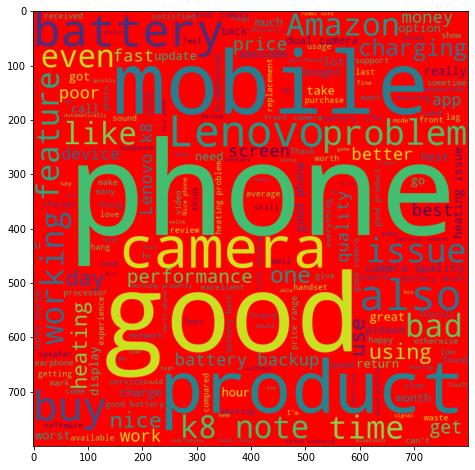

In [14]:
plt.figure(figsize=(10,8))
plt.imshow(word)

In [15]:
# Normalization(casing)
words_lower=[i.lower() for i in words]
words_lower[:10]

['good but need updates and improvements',
 "worst mobile i have bought ever, battery is draining like hell, backup is only 6 to 7 hours with internet uses, even if i put mobile idle its getting discharged.this is biggest lie from amazon & lenove which is not at all expected, they are making full by saying that battery is 4000mah & booster charger is fake, it takes at least 4 to 5 hours to be fully charged.don't know how lenovo will survive by making full of us.please don;t go for this else you will regret like me.",
 'when i will get my 10% cash back.... its already 15 january..',
 'good',
 'the worst phone everthey have changed the last phone but the problem is still same and the amazon is not returning the phone .highly disappointing of amazon',
 "only i'm telling don't buyi'm totally disappointedpoor batterypoor camerawaste of money",
 'phone is awesome. but while charging, it heats up allot..really a genuine reason to hate lenovo k8 note',
 'the battery level has worn down',
 "it'

In [16]:
# Tokenization
tokenized_words=[]
for i in words_lower:
    word_tokenized=word_tokenize(i)
    tokenized_words.append(word_tokenized)
tokenized_words[:10]


[['good', 'but', 'need', 'updates', 'and', 'improvements'],
 ['worst',
  'mobile',
  'i',
  'have',
  'bought',
  'ever',
  ',',
  'battery',
  'is',
  'draining',
  'like',
  'hell',
  ',',
  'backup',
  'is',
  'only',
  '6',
  'to',
  '7',
  'hours',
  'with',
  'internet',
  'uses',
  ',',
  'even',
  'if',
  'i',
  'put',
  'mobile',
  'idle',
  'its',
  'getting',
  'discharged.this',
  'is',
  'biggest',
  'lie',
  'from',
  'amazon',
  '&',
  'lenove',
  'which',
  'is',
  'not',
  'at',
  'all',
  'expected',
  ',',
  'they',
  'are',
  'making',
  'full',
  'by',
  'saying',
  'that',
  'battery',
  'is',
  '4000mah',
  '&',
  'booster',
  'charger',
  'is',
  'fake',
  ',',
  'it',
  'takes',
  'at',
  'least',
  '4',
  'to',
  '5',
  'hours',
  'to',
  'be',
  'fully',
  'charged.do',
  "n't",
  'know',
  'how',
  'lenovo',
  'will',
  'survive',
  'by',
  'making',
  'full',
  'of',
  'us.please',
  'don',
  ';',
  't',
  'go',
  'for',
  'this',
  'else',
  'you',
  'will

In [17]:
type(tokenized_words)

list

In [18]:
# Parts of speech- Tagging
tagging=[]
for i in tokenized_words:
    tagging.append(nltk.pos_tag(i))
tagging[0:5]

[[('good', 'JJ'),
  ('but', 'CC'),
  ('need', 'VBP'),
  ('updates', 'NNS'),
  ('and', 'CC'),
  ('improvements', 'NNS')],
 [('worst', 'JJS'),
  ('mobile', 'NN'),
  ('i', 'NN'),
  ('have', 'VBP'),
  ('bought', 'VBN'),
  ('ever', 'RB'),
  (',', ','),
  ('battery', 'NN'),
  ('is', 'VBZ'),
  ('draining', 'VBG'),
  ('like', 'IN'),
  ('hell', 'NN'),
  (',', ','),
  ('backup', 'NN'),
  ('is', 'VBZ'),
  ('only', 'RB'),
  ('6', 'CD'),
  ('to', 'TO'),
  ('7', 'CD'),
  ('hours', 'NNS'),
  ('with', 'IN'),
  ('internet', 'JJ'),
  ('uses', 'NNS'),
  (',', ','),
  ('even', 'RB'),
  ('if', 'IN'),
  ('i', 'JJ'),
  ('put', 'VBP'),
  ('mobile', 'JJ'),
  ('idle', 'NN'),
  ('its', 'PRP$'),
  ('getting', 'VBG'),
  ('discharged.this', 'NN'),
  ('is', 'VBZ'),
  ('biggest', 'JJS'),
  ('lie', 'NN'),
  ('from', 'IN'),
  ('amazon', 'NN'),
  ('&', 'CC'),
  ('lenove', 'NN'),
  ('which', 'WDT'),
  ('is', 'VBZ'),
  ('not', 'RB'),
  ('at', 'IN'),
  ('all', 'DT'),
  ('expected', 'VBN'),
  (',', ','),
  ('they', 'PRP'),


In [58]:
# POS-tagging(nouns only)
nouns=[]
for i in tagging:
    nouns.append([j for j in i if re.search("NN.*",j[1])])
nouns[0:2]

[[('updates', 'NNS'), ('improvements', 'NNS')],
 [('mobile', 'NN'),
  ('i', 'NN'),
  ('battery', 'NN'),
  ('hell', 'NN'),
  ('backup', 'NN'),
  ('hours', 'NNS'),
  ('uses', 'NNS'),
  ('idle', 'NN'),
  ('discharged.this', 'NN'),
  ('lie', 'NN'),
  ('amazon', 'NN'),
  ('lenove', 'NN'),
  ('battery', 'NN'),
  ('charger', 'NN'),
  ('hours', 'NNS'),
  ('don', 'NN')]]

In [20]:
type(nouns)

list

In [21]:
# lemmatization
lemma= WordNetLemmatizer()
lem=[]
for i in nouns:
    lem.append([lemma.lemmatize(j[0]) for j in i ])
lem[1]



['mobile',
 'i',
 'battery',
 'hell',
 'backup',
 'hour',
 'us',
 'idle',
 'discharged.this',
 'lie',
 'amazon',
 'lenove',
 'battery',
 'charger',
 'hour',
 'don']

In [22]:
# removing Stopwords and punctuations
stopwords1= list(punctuation)+['..']+['...']+['....']+['.....']+['......']
cleaned=[]
for i in lem:
    cleaned.append([word for word in i if word not in stopwords and stopwords1])
cleaned[1]


['mobile',
 'battery',
 'hell',
 'backup',
 'hour',
 'us',
 'idle',
 'discharged.this',
 'lie',
 'amazon',
 'lenove',
 'battery',
 'charger',
 'hour']

In [23]:
dictionary=corpora.Dictionary(cleaned)
dictionary

In [24]:
dictionary.token2id


{'improvement': 0,
 'update': 1,
 'amazon': 2,
 'backup': 3,
 'battery': 4,
 'charger': 5,
 'discharged.this': 6,
 'hell': 7,
 'hour': 8,
 'idle': 9,
 'lenove': 10,
 'lie': 11,
 'mobile': 12,
 'us': 13,
 '%': 14,
 '..': 15,
 'cash': 16,
 'everthey': 17,
 'phone': 18,
 'problem': 19,
 'camerawaste': 20,
 'money': 21,
 'allot': 22,
 'k8': 23,
 'reason': 24,
 'level': 25,
 'ahmedabad': 26,
 'hanging': 27,
 'lenovo': 28,
 'note': 29,
 'station': 30,
 'year': 31,
 'glitch': 32,
 'lot': 33,
 'option': 34,
 'thing': 35,
 'wrost': 36,
 'damage': 37,
 'month': 38,
 'item': 39,
 'life': 40,
 'motherboard': 41,
 'battry': 42,
 'screen': 43,
 'slim': 44,
 'headset': 45,
 'time': 46,
 'card': 47,
 'comparison': 48,
 'credit': 49,
 'deal': 50,
 'prize': 51,
 'product': 52,
 'range': 53,
 'seal': 54,
 'specification': 55,
 'solution': 56,
 'smartphone': 57,
 'galery': 58,
 'speaker': 59,
 'camera': 60,
 'features.excelent': 61,
 'speed.excellent': 62,
 'call': 63,
 'cast': 64,
 'hotspot': 65,
 'wifi'

In [25]:
corpus=[dictionary.doc2bow(i) for i in cleaned]
corpus[25]

[(12, 1), (34, 2), (43, 1), (63, 1), (64, 1), (65, 1), (66, 1)]

In [26]:
# LDA Model
lda_model=LdaModel(corpus=corpus,num_topics=12,id2word=dictionary)

In [27]:
print(' LDA MOdel:')
pprint(lda_model.print_topics())


 LDA MOdel:
[(0,
  '0.248*"phone" + 0.125*"camera" + 0.076*"quality" + 0.024*"feature" + '
  '0.022*".." + 0.016*"sound" + 0.012*"performance" + 0.012*"price" + '
  '0.011*"budget" + 0.010*"everything"'),
 (1,
  '0.060*"...." + 0.045*"amazon" + 0.031*"return" + 0.026*"support" + '
  '0.023*"customer" + 0.023*"phone" + 0.018*"policy" + 0.018*"product" + '
  '0.017*"day" + 0.017*"system"'),
 (2,
  '0.197*"product" + 0.100*".." + 0.072*"problem" + 0.033*"heating" + '
  '0.027*"hai" + 0.026*"h" + 0.025*"camera" + 0.024*"....." + 0.022*"...." + '
  '0.021*"battery"'),
 (3,
  '0.100*"charger" + 0.057*"handset" + 0.037*"feature" + 0.030*"turbo" + '
  '0.027*"set" + 0.021*"charge" + 0.019*"month" + 0.018*"battery" + '
  '0.017*"card" + 0.015*"help"'),
 (4,
  '0.087*"device" + 0.047*"delivery" + 0.043*"phone" + 0.032*"service" + '
  '0.030*"worth" + 0.029*"excellent" + 0.028*"thanks" + 0.025*"amazon" + '
  '0.024*"condition" + 0.021*"camera"'),
 (5,
  '0.063*"waste" + 0.053*"phone" + 0.036*"mon

In [28]:
# coherence value
coherence_model_lda = CoherenceModel(model=lda_model, texts=cleaned, dictionary=dictionary,coherence='c_v')
with np.errstate(invalid='ignore'):
    coherence_lda = coherence_model_lda.get_coherence()
    print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4994583132829789


In [ ]:
# topics 2,5 and 12 closely speaks about amazon
# topics 3,10 closely speaks about battery related issues
# topics 1,6,8 closely speaks about phone features
# After analysis I feel 7 topics will be perfectly fitting

In [29]:
# optimal number of topics after analysing using business lens and then finding the coherence value
lda_model=LdaModel(corpus=corpus,num_topics=7,id2word=dictionary)
pprint(lda_model.print_topics())




    

[(0,
  '0.132*"problem" + 0.068*"heating" + 0.041*"money" + 0.037*"value" + '
  '0.026*"network" + 0.018*"everything" + 0.018*"super" + 0.018*"set" + '
  '0.017*"ok" + 0.012*"cell"'),
 (1,
  '0.110*"mobile" + 0.032*"hai" + 0.030*"h" + 0.024*"speaker" + 0.023*"superb" '
  '+ 0.022*"handset" + 0.015*"ho" + 0.013*"phone" + 0.012*"excellent" + '
  '0.010*"class"'),
 (2,
  '0.201*"phone" + 0.048*"camera" + 0.036*"...." + 0.029*"battery" + '
  '0.020*"quality" + 0.019*"time" + 0.011*"mode" + 0.010*"glass" + '
  '0.010*"display" + 0.010*"day"'),
 (3,
  '0.135*"camera" + 0.062*".." + 0.058*"quality" + 0.032*"performance" + '
  '0.032*"battery" + 0.021*"phone" + 0.015*"feature" + 0.012*"sound" + '
  '0.011*"problem" + 0.011*"mobile"'),
 (4,
  '0.136*"product" + 0.074*"battery" + 0.044*"phone" + 0.041*"price" + '
  '0.028*"charger" + 0.025*"day" + 0.019*".." + 0.018*"backup" + 0.016*"hour" '
  '+ 0.015*"issue"'),
 (5,
  '0.058*"note" + 0.047*"battery" + 0.030*"k8" + 0.020*"heat" + '
  '0.015*"fe

In [30]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=cleaned, dictionary=dictionary,coherence='c_v')
with np.errstate(invalid='ignore'):
    coherence_lda = coherence_model_lda.get_coherence()
    print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.5352624573040906


In [34]:
topics=['general Phone features','Sound Quality','Display','Performance','Price','Battery Issues','Amazon']
df9=pd.DataFrame(topics)
df9

,0
0,general Phone features
1,Sound Quality
2,Display
3,Performance
4,Price
5,Battery Issues
6,Amazon


In [56]:
df10=pd.DataFrame(lda_model.print_topics())
df11=df10.rename(columns={0:'id_no',1:'topic_terms'})
df11

,id_no,topic_terms
0,0,"0.132*""problem"" + 0.068*""heating"" + 0.041*""mon..."
1,1,"0.110*""mobile"" + 0.032*""hai"" + 0.030*""h"" + 0.0..."
2,2,"0.201*""phone"" + 0.048*""camera"" + 0.036*""...."" ..."
3,3,"0.135*""camera"" + 0.062*"".."" + 0.058*""quality"" ..."
4,4,"0.136*""product"" + 0.074*""battery"" + 0.044*""pho..."
5,5,"0.058*""note"" + 0.047*""battery"" + 0.030*""k8"" + ..."
6,6,"0.118*""phone"" + 0.034*""issue"" + 0.025*""lenovo""..."


In [57]:
df12=pd.concat([df9,df11],axis=1)
df13=df12.rename(columns={0:'Topic_names'})
df14=df13.drop(columns=['id_no'],axis=1)
df14


,Topic_names,topic_terms
0,general Phone features,"0.132*""problem"" + 0.068*""heating"" + 0.041*""mon..."
1,Sound Quality,"0.110*""mobile"" + 0.032*""hai"" + 0.030*""h"" + 0.0..."
2,Display,"0.201*""phone"" + 0.048*""camera"" + 0.036*""...."" ..."
3,Performance,"0.135*""camera"" + 0.062*"".."" + 0.058*""quality"" ..."
4,Price,"0.136*""product"" + 0.074*""battery"" + 0.044*""pho..."
5,Battery Issues,"0.058*""note"" + 0.047*""battery"" + 0.030*""k8"" + ..."
6,Amazon,"0.118*""phone"" + 0.034*""issue"" + 0.025*""lenovo""..."
